# 2D Plotting with Matplotlib
## Milestone 4: Plot the Distribution of Renting Data

### 1. Import libraries and read the original dataset into a DataFrame.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
img_dir = "./img/"
data_dir = "./data/"

In [4]:
bikes = pd.read_csv(data_dir + "SeoulBikeData.csv",  
                    encoding = 'unicode_escape',   
                    parse_dates=['Date'],
                    date_format = "%d/%m/%Y"  
                  )

In [5]:
bikes.describe()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2018-05-31 23:59:59.999999744,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
min,2017-12-01 00:00:00,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,2018-03-02 00:00:00,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,2018-06-01 00:00:00,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,2018-08-31 00:00:00,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,2018-11-30 00:00:00,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746


In [6]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [7]:
bikes.sample(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
6772,2018-09-09,264,4,17.0,59,0.0,2000,8.9,0.00,0.0,0.0,Autumn,No Holiday,Yes
7281,2018-09-30,0,9,18.5,62,0.5,1847,11.0,1.00,0.0,0.0,Autumn,No Holiday,No
1281,2018-01-23,228,9,-13.3,36,3.5,2000,-25.2,0.19,0.0,1.0,Winter,No Holiday,Yes
2443,2018-03-12,946,19,10.6,47,2.0,425,-0.2,0.03,0.0,0.0,Spring,No Holiday,Yes
5927,2018-08-04,1155,23,28.2,78,2.5,1678,23.9,0.00,0.0,0.0,Summer,No Holiday,Yes


In [8]:
bikes.Seasons.unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

### 2. Group the DataFrame by Seasons.

In [9]:
season_bikes = bikes[["Seasons","Rented Bike Count"]].groupby('Seasons')
season_bikes

In [10]:
season_bikes.mean()

,Rented Bike Count
Seasons,
Autumn,819.597985
Spring,730.031250
Summer,1034.073370
Winter,225.541204


In [11]:
pd.options.display.max_rows

60

In [12]:
pd.set_option("display.max_rows", 5)

In [13]:
for i,d in season_bikes:
    print(f"\nGroup: {i}")
    print(f"Dataframe: {d}")


Group: Autumn
Dataframe:      Seasons  Rented Bike Count
6576  Autumn               1075
6577  Autumn                975
...      ...                ...
8758  Autumn                712
8759  Autumn                584

[2184 rows x 2 columns]

Group: Spring
Dataframe:      Seasons  Rented Bike Count
2160  Spring                 71
2161  Spring                147
...      ...                ...
4366  Spring               1900
4367  Spring               1343

[2208 rows x 2 columns]

Group: Summer
Dataframe:      Seasons  Rented Bike Count
4368  Summer                963
4369  Summer                776
...      ...                ...
6574  Summer               1789
6575  Summer               1329

[2208 rows x 2 columns]

Group: Winter
Dataframe:      Seasons  Rented Bike Count
0     Winter                254
1     Winter                204
...      ...                ...
2158  Winter                 13
2159  Winter                 23

[2160 rows x 2 columns]


In [14]:
pd.set_option("display.max_rows", 60)

### 3. Create 4 DataFrames corresponding to each season in the groupby object created in Step 2

In [15]:
seasons = []
for i,d in season_bikes:
    seasons.append(i)
seasons

['Autumn', 'Spring', 'Summer', 'Winter']

### 4. Initialize a Figure object and 4 axes objects that share a y-axis

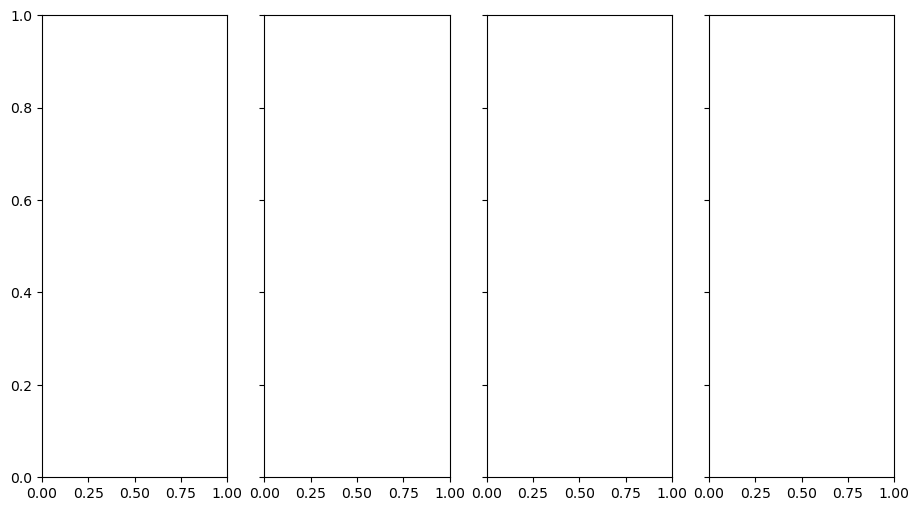

In [16]:
fig, ax = plt.subplots(figsize = (11,6), ncols = 4, nrows = 1, sharey = True)
plt.show()

### 5. Create a violin plot on each axis object

### 6. Set the ticks, tick labels, and title of each plot

###  Distribution of Bikes Rented

In [17]:
from matplotlib.lines import Line2D

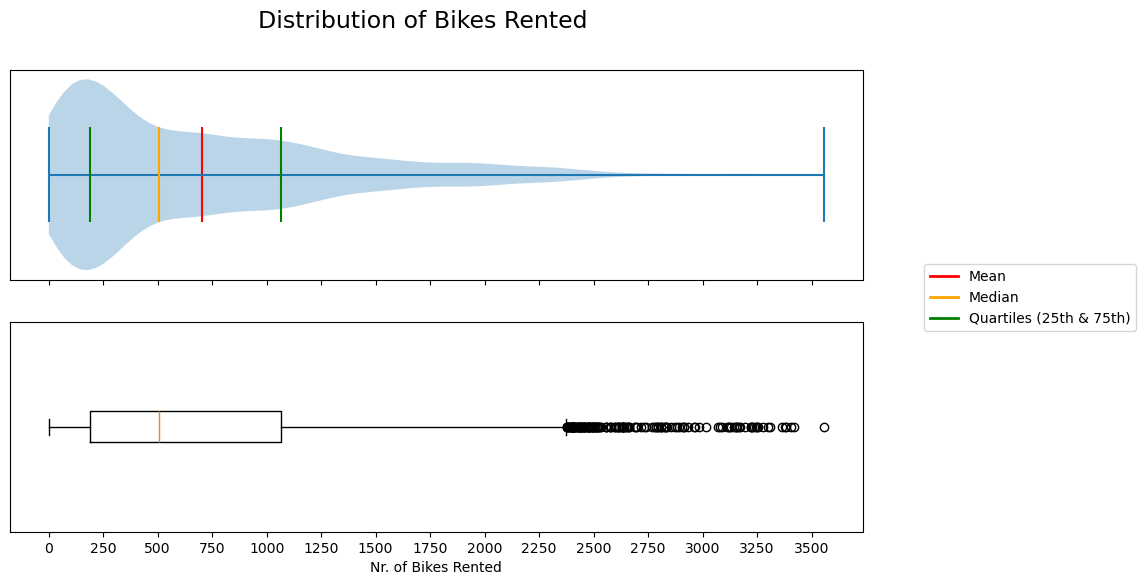

In [18]:
fig, ax = plt.subplots(figsize = (11,6), ncols = 1, nrows = 2, sharex = True)
fig.suptitle('Distribution of Bikes Rented', fontsize = 17)
violin = ax[0].violinplot(bikes["Rented Bike Count"], showmedians=True,  showmeans= True, showextrema = True, quantiles = [0.25,0.75], points=100, vert = False)
# Customize violin colors
violin['cmeans'].set_color('red')       # mean line in red
violin['cquantiles'].set_color('green') # quantiles in green
violin['cmedians'].set_color('orange')   # median line in orange
# --- Custom legend handles ---
legend_elements = [
    Line2D([0], [0], color='red', lw=2, label='Mean'),
    Line2D([0], [0], color='orange', lw=2, label='Median'),
    Line2D([0], [0], color='green', lw=2, label='Quartiles (25th & 75th)')
]
ax[0].set_yticks([])

# Place the legend outside the figure (to the right)
fig.legend(handles=legend_elements, 
           loc='center left', bbox_to_anchor=(0.95, 0.5))
ax[1].boxplot(bikes["Rented Bike Count"], vert = False)
ax[1].set_xticks(range(0,3750,250))
ax[1].set_yticks([])
ax[1].set_xlabel("Nr. of Bikes Rented")
fig.savefig(img_dir+"Distribution_of_Bikes_Rented_2.png" , dpi = 400)
plt.show()

###  Distribution of Bikes Rented

#### **1. Plot Overview**

* This is a **two-part distribution figure**:

  * **Top:** A **violin plot** showing the *distribution shape* of bike rentals along with mean, median, and quartiles.
  * **Bottom:** A **box plot** summarizing the same data with quartiles, whiskers, and outliers.
* The **legend outside the plots** makes it easy to interpret the colored lines inside the violin.
* It’s designed to answer:

  * *How are bike rentals distributed across all days/hours in the dataset?*
  * *Where do the mean, median, and quartiles fall?*
  * *Are there unusual (outlier) days with very high rentals?*

---

#### **2. Code Breakdown**

```python
fig, ax = plt.subplots(figsize=(11,6), ncols=1, nrows=2, sharex=True)
fig.suptitle('Distribution of Bikes Rented', fontsize=17)
```

* Creates a figure with two subplots stacked vertically.
* Adds a main title across the whole figure.

```python
violin = ax[0].violinplot(
    bikes["Rented Bike Count"],
    showmedians=True, showmeans=True, showextrema=True,
    quantiles=[0.25,0.75], points=100, vert=False
)
```

* Draws the violin plot:

  * Shows **mean, median, quartiles, min, and max**.
  * `vert=False` makes it horizontal.
  * `quantiles=[0.25,0.75]` ensures 25th and 75th lines are drawn.

```python
violin['cmeans'].set_color('red')      # mean in red
violin['cquantiles'].set_color('green') # quartiles in green
violin['cmedians'].set_color('orange')  # median in orange
```

* Colors the lines to make them easy to distinguish.

```python
legend_elements = [
    Line2D([0], [0], color='red', lw=2, label='Mean'),
    Line2D([0], [0], color='orange', lw=2, label='Median'),
    Line2D([0], [0], color='green', lw=2, label='Quartiles (25th & 75th)')
]
```

* Creates custom legend entries (since violinplot doesn’t label them automatically).

```python
ax[0].set_yticks([])
```

* Removes the meaningless “1” from the y-axis of the violin.

```python
fig.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(0.95, 0.5))
```

* Places the legend **outside the plots**, vertically centered on the right.

```python
ax[1].boxplot(bikes["Rented Bike Count"], vert=False)
ax[1].set_xticks(range(0,3750,250))
ax[1].set_yticks([])
ax[1].set_xlabel("Nr. of Bikes Rented")
```

* Draws the box plot horizontally.
* Removes its y-axis ticks for a cleaner look.
* Labels the x-axis with “Nr. of Bikes Rented”.

```python
fig.savefig(..., dpi=400)
plt.show()
```

* Saves a high-resolution image and displays it.

---

#### **3. Visual Elements Analysis: Answer the following questions**

* What do you notice about the width of the violin — where is it widest, and what does that tell you about common rental values?
* What do you notice about the box plot whiskers and outliers — do they stretch more to one side?
* How does placing the legend outside help the plots look less crowded?

---

#### **4. Data Interpretation: Answer the following questions**

* Is the distribution of bike rentals skewed to the right (with a longer tail of high rental days)?
* How does the mean (red) compare to the median (orange) — are they in the same place, or does the mean pull rightward because of outliers?
* Looking at the box plot, do you see many outliers? How extreme are they?
* What’s the typical range of rentals (between the green quartile lines)?

---

#### **5. Learning Points**

* **Key Matplotlib concepts shown:**

  * How to combine violin and box plots for richer distribution insights.
  * How to customize violin components (color for mean, median, quartiles).
  * How to build a custom legend with `Line2D`.
  * How to clean up axes (`set_yticks([])`) for clarity.
* **When to use this kind of plot:**

  * When you want to show both **distribution shape** (violin) and **summary stats/outliers** (box).
* **Common student mistakes:**

  * Misinterpreting violin width as frequency (it’s density).
  * Forgetting to explain the meaning of colored lines.


In [19]:
bikes["Rented Bike Count"].describe()

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented Bike Count, dtype: float64

### Seasonal Distribution of Rented Bikes

In [20]:
season_bikes.get_group(seasons[0])

,Seasons,Rented Bike Count
6576,Autumn,1075
6577,Autumn,975
6578,Autumn,785
6579,Autumn,514
6580,Autumn,338
...,...,...
8755,Autumn,1003
8756,Autumn,764
8757,Autumn,694
8758,Autumn,712


In [21]:
for i,season_df in season_bikes:
    # season_df = d  season_bikes.get_group(seasons[i])
    season_bc = season_df["Rented Bike Count"]
    print(season_bc)

6576    1075
6577     975
6578     785
6579     514
6580     338
        ... 
8755    1003
8756     764
8757     694
8758     712
8759     584
Name: Rented Bike Count, Length: 2184, dtype: int64
2160      71
2161     147
2162     180
2163      92
2164      28
        ... 
4363    2534
4364    2164
4365    2070
4366    1900
4367    1343
Name: Rented Bike Count, Length: 2208, dtype: int64
4368     963
4369     776
4370     554
4371     366
4372     265
        ... 
6571    2372
6572    1995
6573    1931
6574    1789
6575    1329
Name: Rented Bike Count, Length: 2208, dtype: int64
0       254
1       204
2       173
3       107
4        78
       ... 
2155     19
2156      8
2157     10
2158     13
2159     23
Name: Rented Bike Count, Length: 2160, dtype: int64


### Seasonal Distribution of Rented Bikes

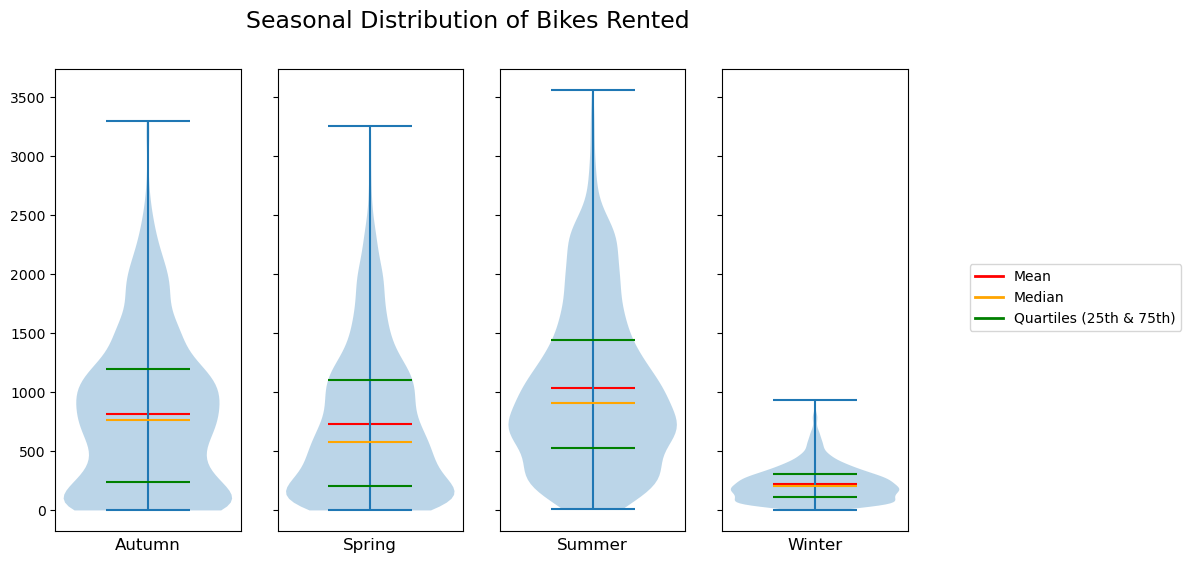

In [22]:
fig, ax = plt.subplots(figsize = (11,6), ncols = 4, nrows = 1, sharey = True)
fig.suptitle('Seasonal Distribution of Bikes Rented', fontsize = 17)

for i, (season,season_df) in zip(range(len(seasons)),season_bikes):
    # season_df = d  season_bikes.get_group(seasons[i])
    season_bc = season_df["Rented Bike Count"]
    violin = ax[i].violinplot(season_bc, showmedians=True,  showmeans= True, showextrema = True, quantiles = [0.25,0.75], points=100)
    ax[i].set_xticks([])
    # Add season name as x-axis labecl
    ax[i].set_xlabel(season, fontsize=12)
    # Customize violin colors
    violin['cmeans'].set_color('red')       # mean line in red
    violin['cquantiles'].set_color('green') # quantiles in green
    violin['cmedians'].set_color('orange')   # median line in orange

# --- Custom legend handles ---
legend_elements = [
    Line2D([0], [0], color='red', lw=2, label='Mean'),
    Line2D([0], [0], color='orange', lw=2, label='Median'),
    Line2D([0], [0], color='green', lw=2, label='Quartiles (25th & 75th)')
]
fig.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(0.95, 0.5))
fig.savefig(img_dir+"Seasonal_Distribution_of_Bikes_Rented.png" , dpi = 400)
plt.show()

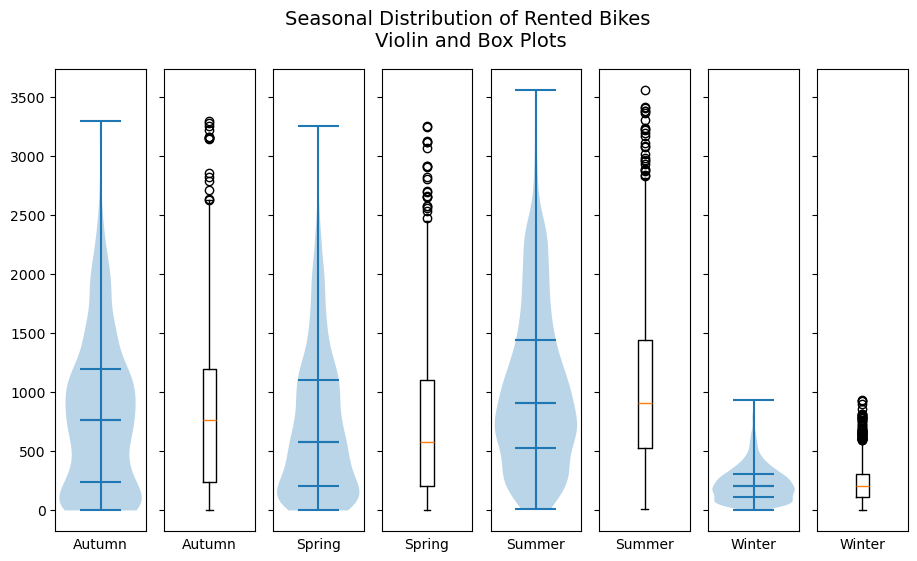

In [23]:
fig, ax = plt.subplots(figsize = (11,6), ncols = 8, nrows = 1, sharey = True)
fig.suptitle('Seasonal Distribution of Rented Bikes\n Violin and Box Plots', fontsize = 14)

for i in range(len(seasons)):
    season_bc = season_bikes.get_group(seasons[i])["Rented Bike Count"]
    season = seasons[i]
    ax[2*i].violinplot(season_bc, showmedians=True,  showextrema = True, quantiles = [0.25,0.50,0.75], points=100)
    ax[2*i].set_xticks([])
    ax[2*i].set_xlabel(season, fontsize=10)
    ax[2*i+1].boxplot(season_bc)
    ax[2*i+1].set_xticks([])
    ax[2*i+1].set_xlabel(season, fontsize=10)
plt.show()

### 7. Customize the body of each plot 
- Change the face color and edge color
- Display the probability distribution.

In [24]:
season_color = ['chocolate', 'springgreen', 'red', 'lightskyblue' ]

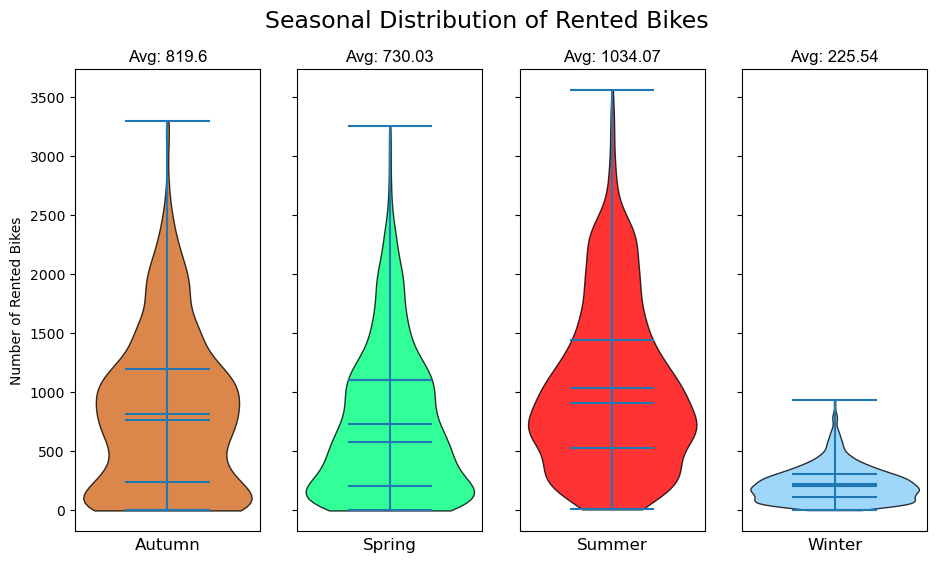

In [25]:
fig, ax = plt.subplots(figsize = (11,6), ncols = 4, nrows = 1, sharey = True)
fig.suptitle('Seasonal Distribution of Rented Bikes', fontsize = 17)

for i, (season,season_df) in zip(range(len(seasons)),season_bikes):
    # season_df = d  season_bikes.get_group(seasons[i])
    season_bc = season_df["Rented Bike Count"]
    violin = ax[i].violinplot(season_bc, showmedians=True,  showmeans= True, showextrema = True, quantiles = [0.25,0.75], points=100)
    # Delete the ticks
    ax[i].set_xticks([])
    # Add season name as x-axis labecl
    ax[i].set_xlabel(season, fontsize=12)
    # Add a title for each violin
    season_bc_avg = season_bc.mean().round(2)
    ax[i].set_title(f'Avg: {season_bc_avg}',  fontname = "Arial", fontsize = 12)
    for pc in violin['bodies']:
        pc.set_facecolor(season_color[i])
        pc.set_edgecolor('black')
        pc.set_alpha(0.8)
    ax[0].set_ylabel("Number of Rented Bikes")

plt.show()

In [26]:
type(ax)

numpy.ndarray

In [27]:
type(ax[0])

matplotlib.axes._axes.Axes

### 7. Adjust the space around each axis in the figure.

In [28]:
plt.rcParams["figure.subplot.top"]

0.88

In [29]:
plt.rcParams["figure.subplot.bottom"]

0.11

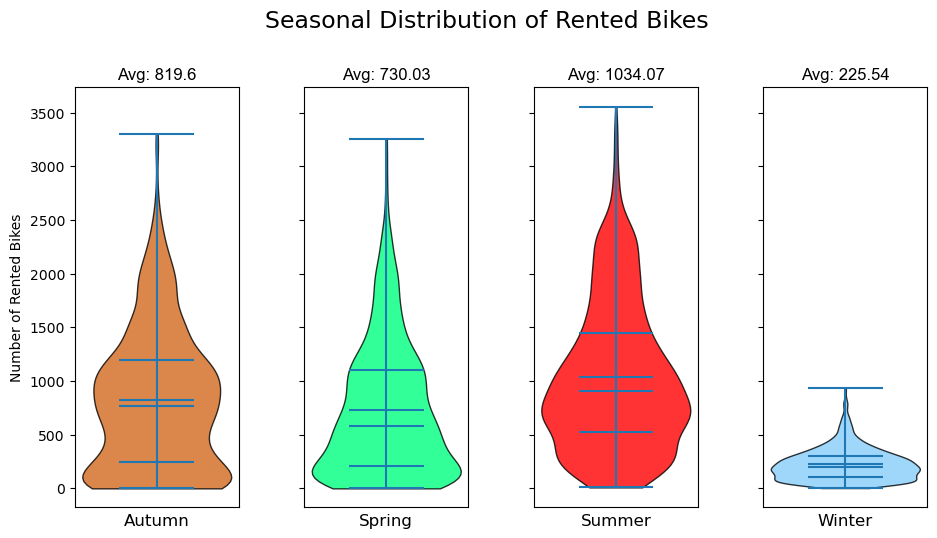

In [30]:
fig, ax = plt.subplots(figsize = (11,6), ncols = 4, nrows = 1, sharey = True)
fig.suptitle('Seasonal Distribution of Rented Bikes', fontsize = 17)

for i, (season,season_df) in zip(range(len(seasons)),season_bikes):
    # season_df = d  season_bikes.get_group(seasons[i])
    season_bc = season_df["Rented Bike Count"]
    violin = ax[i].violinplot(season_bc, showmedians=True,  showmeans= True, showextrema = True, quantiles = [0.25,0.75], points=100)
    # Delete the ticks
    ax[i].set_xticks([])
    # Add season name as x-axis labecl
    ax[i].set_xlabel(season, fontsize=12)
    # Add a title for each violin
    season_bc_avg = season_bc.mean().round(2)
    ax[i].set_title(f'Avg: {season_bc_avg}',  fontname = "Arial", fontsize = 12)
    for pc in violin['bodies']:
        pc.set_facecolor(season_color[i])
        pc.set_edgecolor('black')
        pc.set_alpha(0.8)
    ax[0].set_ylabel("Number of Rented Bikes")
plt.subplots_adjust(top= 0.85, bottom=0.15, wspace=0.4)
fig.savefig(img_dir+"Seasonal_Distribution_of_Bikes_Rented_2.png" , dpi = 400)
plt.show()

### Seasonal Distribution of Bikes Rented
#### **1. Plot Overview**

* This is a set of **four violin plots**, each representing the distribution of bikes rented in one season.
* Violin plots show both the **probability distribution (shape/density)** and **summary statistics** (median, mean, quartiles).
* The design helps answer:

  * *How does bike rental behavior differ across seasons?*
  * *Which seasons have higher or lower average demand?*
  * *Is variability (spread) in rentals larger in some seasons than others?*

---

#### **2. Code Breakdown**

```python
fig, ax = plt.subplots(figsize=(11,6), ncols=4, nrows=1, sharey=True)
fig.suptitle('Seasonal Distribution of Rented Bikes', fontsize=17)
```

* Creates one row with 4 subplots (one per season), all sharing the same y-axis so comparisons are fair.
* Adds a main figure title.

```python
for i, (season, season_df) in zip(range(len(seasons)), season_bikes):
    season_bc = season_df["Rented Bike Count"]
    violin = ax[i].violinplot(season_bc, ...)
```

* Iterates through grouped seasonal data.
* `violinplot` draws the violin shape and includes mean, median, and quartiles.

```python
ax[i].set_xticks([])
ax[i].set_xlabel(season, fontsize=12)
```

* Removes meaningless x-ticks and replaces them with season names as labels.

```python
season_bc_avg = season_bc.mean().round(2)
ax[i].set_title(f'Avg: {season_bc_avg}', fontsize=12)
```

* Adds the average rental value as a small per-plot title.

```python
for pc in violin['bodies']:
    pc.set_facecolor(season_color[i])
    pc.set_edgecolor('black')
    pc.set_alpha(0.8)
```

* Customizes each violin’s fill color and edge, making them visually distinct by season.

```python
ax[0].set_ylabel("Number of Rented Bikes")
```

* Labels the y-axis only once, to avoid repetition across panels.

```python
plt.subplots_adjust(top=0.85, bottom=0.15, wspace=0.4)
```

* Adjusts spacing so titles and labels don’t overlap.

---

#### **3. Visual Elements Analysis: Answer the folowing questions**

* What do you notice about the widths of the violins — where are they widest, and what does that say about the most common rental levels?
* How would you describe the colors — do they help you quickly distinguish seasons?
* What do you notice about the season averages in the titles — which season seems highest or lowest?
* How does using a shared y-axis help you compare across seasons?

---

#### **4. Data Interpretation: Answer the folowing questions**

* Which season shows the highest average rentals?
* Which season has the widest distribution (largest spread in rentals), meaning more variability?
* Are there seasons where rentals are consistently low (narrow violins)?
* What do these patterns suggest about how weather/seasonal conditions affect bike demand?

---

#### **5. Learning Points**

* **Key Matplotlib concepts:**

  * Using `violinplot` with custom options (mean, median, quartiles).
  * Sharing axes across subplots for fair comparison.
  * Coloring and customizing violin bodies.
  * Adding per-panel titles with computed stats.
* **Best use cases:**

  * Comparing **distributions across categories** (like seasons, weekdays, or customer groups).
* **Common student mistakes:**

  * Forgetting `sharey=True`, which makes seasonal comparisons misleading.
  * Interpreting violin *width* as frequency instead of density.
  * Not labeling categories clearly (just leaving “1, 2, 3, 4” on the x-axis).

### 8. Save the figure as a pdf file

In [31]:
from matplotlib.backends.backend_pdf import PdfPages

In [32]:
pdf = PdfPages(img_dir+"P1_M4.pdf")

In [33]:
type(pdf)

matplotlib.backends.backend_pdf.PdfPages

In [34]:
pdf.savefig(fig)

In [35]:
pdf.close()